In [1]:
#Q.1- Import MNIST dataset from sklearn. Save data and targets in variables X and Y respectively

from sklearn.datasets import load_digits
digits = load_digits()

#Q.2- Perform feature scaling. 

x =  digits.data[:-10]
y = digits.target[:-10]
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(x)
print(standardized_data.shape)





#Q.3- Split the dataset into training and testing sets using train_test_split() 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)


(1787, 64)


shape of pca_reduced.shape =  (1787, 2)


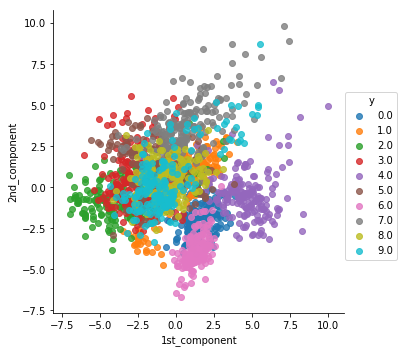

In [3]:
#Q.4- Perform PCA. Take any value for components. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# initializing pca
from sklearn import decomposition
pca = decomposition.PCA()

# taking number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)


# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, y)).T

# creating a new data frame to plot the resultant data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_component", "2nd_component", "y"))
sns.lmplot('1st_component', '2nd_component', data=pca_df, hue='y', fit_reg=False)
plt.show()

In [4]:
#Q.5- Perform classification (logistic regression).

from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(x_train,y_train)
print("y_intercept:",regressor.intercept_)
print("*"*110)
print("\n")
print("slope:",regressor.coef_)
y_pred = regressor.predict(x_test)


y_intercept: [-0.01723642 -2.3176533  -0.02909063 -0.07299915  0.01241219 -0.0531428
 -0.0847975   0.0125239  -2.279405   -0.86351001]
**************************************************************************************************************


slope: [[ 0.00000000e+00 -6.04537944e-02 -9.90218911e-02  6.02564058e-02
  -5.18883661e-02 -3.54832152e-01 -1.90222424e-01 -2.71429483e-02
  -1.13512422e-05 -1.95169295e-01  1.73685412e-02  1.11881891e-01
   1.58050419e-01  2.88966022e-01 -4.06484141e-02 -2.14817724e-02
  -3.43811034e-06  5.80090081e-02  2.30463858e-01 -5.62576981e-02
  -3.72681208e-01  2.30869230e-01  1.37631862e-02 -1.38585958e-02
  -9.34664840e-07  7.60015956e-02  8.03643057e-03 -1.59575367e-01
  -5.70323008e-01  4.33874997e-02  8.52280881e-02 -7.57335497e-06
   0.00000000e+00  1.90558661e-01  1.78954345e-01 -2.02361385e-01
  -5.24460563e-01 -5.33476541e-02 -4.09652778e-02  0.00000000e+00
  -1.26968796e-03  2.56682722e-02  9.24562871e-02 -2.24676610e-01
  -4.01514488e-01 -

In [5]:
#Q.6- Print the following: 
'''
a. Accuracy score
b. Confusion Matrix
c. Classification Report'''

from sklearn import metrics
ac_sc = metrics.accuracy_score(y_test, y_pred)
print(ac_sc)

print("*"*110)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print("*"*110)
print(classification_report(y_test, y_pred))

0.957169459962756
**************************************************************************************************************
[[55  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  1  0  0  0  0  4  0]
 [ 0  1 59  3  0  0  0  0  0  0]
 [ 0  0  0 59  0  1  0  0  0  0]
 [ 0  1  0  0 47  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  1  1]
 [ 0  1  0  0  0  0 50  0  0  0]
 [ 0  0  0  0  1  0  0 48  0  0]
 [ 0  2  0  0  0  0  0  0 50  1]
 [ 0  0  0  1  0  1  0  0  2 44]]
**************************************************************************************************************
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        55
          1       0.90      0.92      0.91        60
          2       1.00      0.94      0.97        63
          3       0.92      0.98      0.95        60
          4       0.98      0.98      0.98        48
          5       0.96      0.94      0.95        50
          6       1.00      0.98      0.99        51
    